# Quora Question Pair Similarity

# *Section 1*
- About the data
- Basic EDA
- Feature Addition
- Data preprocessing

## About
Quora is a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world. Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions.

- Dataset can be downloaded from [here](!https://www.kaggle.com/c/quora-question-pairs/data)
- Objetive is to predict whether a pair of questions are duplicates or not.

### Download and Extracting Files
- Check [this](!https://mdiqbalbajmi00786.medium.com/how-to-unzip-a-zip-file-in-jupyter-google-colab-e024c5707e68) medium article

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,hi-IN;q=0.8,hi;q=0.7,ta-IN;q=0.6,ta;q=0.5,en-GB;q=0.4,en-US;q=0.3" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6277/323734/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620458328&Signature=QVx6GfeYuMwOZpxUV4jVfWIPAPs9%2BbMbZJ6BZGU47K4S6lx6rV2LJp9pzf5y092MxoPM%2BlsHIJPiheL3A%2FqXr9t4cA1Gv%2BRrZRfM0X%2BoOupoJjW53vwrIRgdFzNYrHLgwJQpjIzSvBaAMR%2B7d%2F4uUfvJshOsaXmPfSeSHpkXUsRxUiKKpEJiYdKCCkynW%2FjD2L9%2BVeKH8V%2FQU6ymPrMt39i1%2FLob%2FWlCXahhbL0WlIuLtmlxRh%2B%2Bg4acAjdUph3ssktnAe0CwDMIO7NjRNxEyijIgVMmgu7e7ZVUC%2BaO%2B19bpdgkMmSI7EK6Ol0h3XRpoxskgvqMJoLUIzSkuq8RHg%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-question-pairs.zip" -c -O 'quora-question-pairs.zip'

--2021-05-05 14:54:26--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6277/323734/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620458328&Signature=QVx6GfeYuMwOZpxUV4jVfWIPAPs9%2BbMbZJ6BZGU47K4S6lx6rV2LJp9pzf5y092MxoPM%2BlsHIJPiheL3A%2FqXr9t4cA1Gv%2BRrZRfM0X%2BoOupoJjW53vwrIRgdFzNYrHLgwJQpjIzSvBaAMR%2B7d%2F4uUfvJshOsaXmPfSeSHpkXUsRxUiKKpEJiYdKCCkynW%2FjD2L9%2BVeKH8V%2FQU6ymPrMt39i1%2FLob%2FWlCXahhbL0WlIuLtmlxRh%2B%2Bg4acAjdUph3ssktnAe0CwDMIO7NjRNxEyijIgVMmgu7e7ZVUC%2BaO%2B19bpdgkMmSI7EK6Ol0h3XRpoxskgvqMJoLUIzSkuq8RHg%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-question-pairs.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; 

In [ ]:
!pip install patool

In [ ]:
import patoolib
patoolib.extract_archive("quora-question-pairs.zip")
patoolib.extract_archive("/content/quora-question-pairs/train.csv.zip")

patool: Extracting quora-question-pairs.zip ...
patool: running /usr/bin/7z x -o./Unpack_6hcbl1q1 -- quora-question-pairs.zip
patool: ... quora-question-pairs.zip extracted to `quora-question-pairs2' (multiple files in root).
patool: Extracting /content/quora-question-pairs/train.csv.zip ...
patool: running /usr/bin/7z x -o./Unpack_ahloubas -- /content/quora-question-pairs/train.csv.zip
patool: ... /content/quora-question-pairs/train.csv.zip extracted to `train.csv2' (local file exists).


'train.csv2'

### Reading Dataset

In [ ]:
import pandas as pd

data = pd.read_csv("/content/train.csv")
print(f'shape: {data.shape}')

shape: (404290, 6)


**Columns**
- id: Row ID
- qid{1, 2}: The unique ID of each question in the pair
- question{1, 2}: The actual textual contents of the questions.
- is_duplicate: Whether the two questions are duplicates. <br>
  0: Not Duplicate<br>
  1: Duplicate

In [ ]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Exploring the Data

In [ ]:
data.info()  # Checking non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


There are 3 questions with null values. 1 record in question1 column is null and 2 records from question2 column are null. We should replace these null records with empty string.

In [ ]:
data = data.fillna('')  # Replacing null values with empty string
data.info()             # Checking non-null count after replacing null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404290 non-null  object
 4   question2     404290 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


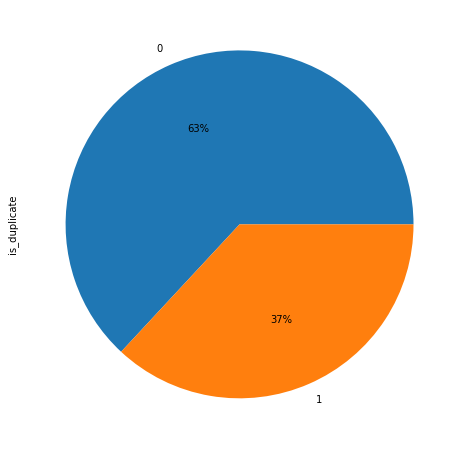

In [ ]:
# Frequency of duplicate questions
data['is_duplicate'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.0f%%');

63% of question pairs are not duplicate of each other. 37% of question pairs are duplicate.

## Feature Addition
- Constructing new features based on mathematical logics
- Based on word count and frequencies in question pairs

In [ ]:
def get_common_word_count(data):
  word_common = []
  for i in range(len(data)):
    word_common.append(len(set(data['question1'][i].lower().split()) & set(data['question2'][i].lower().split())))
  return word_common

def get_total_word_count(data):
  total_words = []
  for i in range(len(data)):
    total_words.append(len(set(data['question1'][i].lower().split())) + len(set(data['question2'][i].lower().split())))
  return total_words

data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count')              # How many times question ids in qid1 columns repeat / frequency of qid1's
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')              # How many times question ids in qid2 columns repeat / frequency of qid2's
data['q1len'] = data['question1'].str.len()                                      # No. of characters in question1 
data['q2len'] = data['question2'].str.len()                                      # No. of characters in question2
data['q1_n_words'] = data['question1'].apply(lambda row: len(row.split(" ")))    # No. of words in question1
data['q2_n_words'] = data['question2'].apply(lambda row: len(row.split(" ")))    # No. of words in question2
data['word_common_count'] = get_common_word_count(data)                          # No. of common words in a pair of questions
data['total_word_count'] = get_total_word_count(data)                            # Total no. of words in each pair of questions
data['word_share'] = data['word_common_count']/data['total_word_count']          # Percentage of common word count w.r.t total word count

In [ ]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common_count,total_word_count,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000


## Data Preprocessing
- Removing html tags and Punctuations
- Performing stemming
- Removing Stopwords
- Expanding contractions

In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()                                                                                          # Porter stemmer
STOP_WORDS = stopwords.words("english")                                                                       # Stop words

def preprocess(column):
  clean_ques = []
  for ques in data[column]:
    ques = ques.lower()                                                                                       # Converting to lower case and fixing contractions
    ques = ques.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
              .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
              .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
              .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
              .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
              .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
              .replace("€", " euro ").replace("'ll", " will").replace('>', '').replace('<', '')\
              .replace("-", "").replace("(", "").replace(")", "").replace(',', '').replace('/', '')\
              .replace('`', '').replace('"', '').replace(',', '').replace('}', '').replace('{', '')\
              .replace('[', '').replace(']', '').replace('@', '').replace('#', '').replace('^', '')\
              .replace('&', '').replace('*', '').replace('-', '').replace('+', '').replace('~', '')\
              .replace('+', '').replace('|', '').replace('?', '').replace('"', '').replace('_', '')

    ques = ques.strip(string.punctuation)
    ques = re.sub(r"[,.;@#?!&$]+\ *", " ", ques)                                                              # Removing punctuation
    ques = re.sub(r"([0-9]+)000000", r"\1m", ques)
    ques = re.sub(r"([0-9]+)000000", r"\1m", ques)                                                               
    ques = re.sub(' +', ' ', ques)                                                                            # Removing multiple spaces
    
    text_tokens = word_tokenize(ques)
    tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]                              # Reoving stop words
    stemmed_tokens_without_sw = [ps.stem(word) for word in tokens_without_sw]                                 # Stemming words
    filtered_ques = (" ").join(tokens_without_sw)
    clean_ques.append(filtered_ques)
  return clean_ques

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['question1'] = preprocess('question1')
data['question2'] = preprocess('question2')

In [ ]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common_count,total_word_count,word_share
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,1,1,73,59,14,10,4,24,0.166667
3,3,7,8,mentally lonely solve,find remainder math 23 24 math divided 2423,0,1,1,50,65,11,9,0,19,0.000000
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,3,1,76,39,13,7,2,20,0.100000


In [ ]:
# data.to_csv('data_part1.csv', index=False)

# *Section 2*
- Advanced feature extraction<br>
- https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br>
  *fuzz ratio*<br>
  *fuzz partial ratio*<br>
  *Token sort ratio*<br>
  *Token set ratio*<br>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Case Studies/Quora Case Study/data_part1.csv').fillna('')
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common_count,total_word_count,word_share
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,1,1,73,59,14,10,4,24,0.166667
3,3,7,8,mentally lonely solve,find remainder math 23 24 math divided 2423,0,1,1,50,65,11,9,0,19,0.000000
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,3,1,76,39,13,7,2,20,0.100000


In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

data["fuzz_ratio"] = data.apply(lambda x: fuzz.ratio(x["question1"], x["question2"]), axis=1)
data["partial_ratio"] = data.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
data["token_sort_ratio"] = data.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
data["token_set_ratio"] = data.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)

In [ ]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common_count,total_word_count,word_share,fuzz_ratio,partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,1,1,66,57,14,12,10,23,0.434783,92,100,92,100
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,4,1,51,88,8,13,4,20,0.200000,59,94,59,84
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,1,1,73,59,14,10,4,24,0.166667,55,46,65,65


In [ ]:
# data.to_csv('data_part2.csv', index=False)

# *Section 3*
- Train test split
- Normalizing numerical features
- Vectorizing text features

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
data = pd.read_csv("/content/gdrive/MyDrive/Case Studies/Quora Case Study/data_part2.csv.gz", compression='gzip').fillna('')
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common_count,total_word_count,word_share,fuzz_ratio,partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,1,1,66,57,14,12,10,23,0.434783,92,100,92,100
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,4,1,51,88,8,13,4,20,0.200000,59,94,59,84
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,1,1,73,59,14,10,4,24,0.166667,55,46,65,65


In [3]:
# Combining questions into single column
data['questions'] = data['question1'] + data['question2']
data = data.drop(['question1', 'question2'], axis=1)
data.head(3)

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common_count,total_word_count,word_share,fuzz_ratio,partial_ratio,token_sort_ratio,token_set_ratio,questions
0,0,1,2,0,1,1,66,57,14,12,10,23,0.434783,92,100,92,100,step step guide invest share market indiastep ...
1,1,3,4,0,4,1,51,88,8,13,4,20,0.200000,59,94,59,84,story kohinoor kohinoor diamondwould happen in...
2,2,5,6,0,1,1,73,59,14,10,4,24,0.166667,55,46,65,65,increase speed internet connection using vpnin...


In [4]:
# Considering first 1,00,000 records for training the model. It will take time if we tran on all the data points.
data = data.iloc[0:100000, :]
print(data.shape)
print(data['is_duplicate'].value_counts())

(100000, 18)
0    62746
1    37254
Name: is_duplicate, dtype: int64


We have significantly good sample for duplicate and non duplicate records

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

X = data.drop(['is_duplicate'], axis=1) 
y = data['is_duplicate']

X_train,X_test,y_train, y_test=train_test_split(X, y, test_size=0.30,stratify = y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (70000, 17)
Shape X_test: (30000, 17)
Shape y_train: (70000,)
Shape y_test: (30000,)


In [6]:
# Normalize numerical features
from sklearn.preprocessing import Normalizer

def normalize_features(feature):
  scaler = Normalizer()
  scaler.fit(X_train[feature].values.reshape(1,-1))

  X_train_feature = scaler.transform(X_train[feature].values.reshape(1,-1))
  X_test_feature = scaler.transform(X_test[feature].values.reshape(1,-1))

  X_train_feature = X_train_feature.reshape(-1,1)
  X_test_feature = X_test_feature.reshape(-1,1)

  return X_train_feature, X_test_feature

X_train_1, X_test_1 = normalize_features('freq_qid1')
X_train_2, X_test_2 = normalize_features('freq_qid2')
X_train_3, X_test_3 = normalize_features('q1len')
X_train_4, X_test_4 = normalize_features('q2len')
X_train_5, X_test_5 = normalize_features('q1_n_words')
X_train_6, X_test_6 = normalize_features('q2_n_words')
X_train_7, X_test_7 = normalize_features('word_common_count')
X_train_8, X_test_8 = normalize_features('total_word_count')
X_train_9, X_test_9 = normalize_features('word_share')
X_train_10, X_test_10 = normalize_features('fuzz_ratio')
X_train_11, X_test_11 = normalize_features('partial_ratio')
X_train_12, X_test_12 = normalize_features('token_sort_ratio')
X_train_13, X_test_13 = normalize_features('token_set_ratio')

In [7]:
# Vectorize text features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['questions'].values)

X_train_vec = vectorizer.transform(X_train['questions'].values)
X_test_vec = vectorizer.transform(X_test['questions'].values)

In [8]:
# Stacking all features
from scipy.sparse import hstack

X_train_tfidf = hstack((X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6, X_train_7, X_train_8, X_train_9, X_train_10, X_train_11, X_train_12, X_train_13, X_train_vec)).tocsr()
X_test_tfidf = hstack((X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6, X_test_7, X_test_8, X_test_9, X_test_10, X_test_11, X_test_12, X_test_13, X_test_vec)).tocsr()

# *Logistic Regression*

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={
      "C":[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 
      "penalty":["l1","l2"],
      }

log_reg = LogisticRegression(solver='liblinear')
log_reg_cv = GridSearchCV(log_reg, grid, scoring='roc_auc', return_train_score=True, cv=5, verbose=1)
log_reg_cv.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [10]:
best_score = log_reg_cv.best_score_
best_params = log_reg_cv.best_params_

print(f'Best Score: {best_score}')
print(f'Best Params: {best_params}')

Best Score: 0.8744134660997684
Best Params: {'C': 1.0, 'penalty': 'l1'}


In [17]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

log_reg = LogisticRegression(solver='liblinear',
                             C=best_params.get('C'),
                             penalty=best_params.get('penalty')
                            )

log_reg.fit(X_train_tfidf, y_train)

y_pred = log_reg.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.48      0.65     18824
           1       0.53      0.98      0.69     11176

    accuracy                           0.67     30000
   macro avg       0.75      0.73      0.67     30000
weighted avg       0.81      0.67      0.66     30000



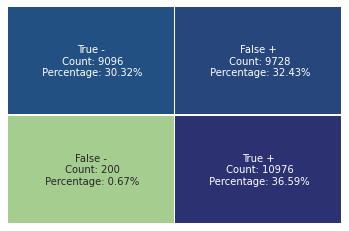

In [20]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(cm):
    group_names = ['True -','False +','False -','True +']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n Count: {v2}\n Percentage: {v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cm, annot=labels, fmt='', cmap='crest', linewidths=.2, yticklabels=False, xticklabels=False, cbar=False)

cm = confusion_matrix(y_test, y_pred)
get_confusion_matrix(cm);

- Looking at the classification report we can say that 47% of non-duplicate questions are getting misclassified as duplicate.
- However, 98% of duplicate question are correctly getting classified.
- Confusion matrix shows that 32.4% of data points are incorrectly getting classified.
- Arount 67% points are getting correctly classified. 